1. Mengidentifikasi perokok tertinggi dan terendah berdasarkan kelompok umur dan wilyah.
- Kelompok umur mana yang memiliki persentase merokok tertinggi?
- Perbedaan mencolok antar kelompok umur
- wilayah mana yang memiliki tingkat perokok tertinggi
- Perbandingan wilayah dengan persentase merokok tertinggi


2. Mengetahui perubahan tren perokok dari perbandingan antar tahun
- tahun berapa terjadi kenaikan atau penurunan tingkat merokok menurut usia
- wilayah mana yang mengalami perubahan signifikan?
- perubahan rata-rata wilayah antar tahun

3. Analisa pola umum dari data
- korelasi data antara kelompok umur dan persentase perokok


In [25]:
#import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv")
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")

#cek struktur data
# data.info()
# data
gdata = pd.concat([data1,data2,data3,data4])
# hgdata = gdata.groupby("Wilayah")
gdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wilayah,108,27,Bogor,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perokok 15-24,108.0,NaN,NaN,NaN,13.946111,2.410099,7.78,12.325,14.17,15.5825,18.89
Perokok 25-34,108.0,NaN,NaN,NaN,22.973611,3.261562,14.31,20.9375,23.205,25.48,29.69
Perokok 35-44,108.0,NaN,NaN,NaN,23.234167,2.146152,18.46,21.785,22.82,24.285,28.94
Perokok 45-54,108.0,NaN,NaN,NaN,19.651204,1.817134,15.31,18.47,19.495,20.5975,24.41
Perokok 55-64,108.0,NaN,NaN,NaN,12.795,2.69759,7.85,10.9475,12.43,14.835,19.54
Perokok 65+,108.0,NaN,NaN,NaN,7.778611,5.058286,2.62,5.3725,7.015,9.405,50.58
tahun,108.0,NaN,NaN,NaN,2021.5,1.123246,2020.0,2020.75,2021.5,2022.25,2023.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15200\192404643.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_umur.index, y=rata_umur.values, palette="Spectral")


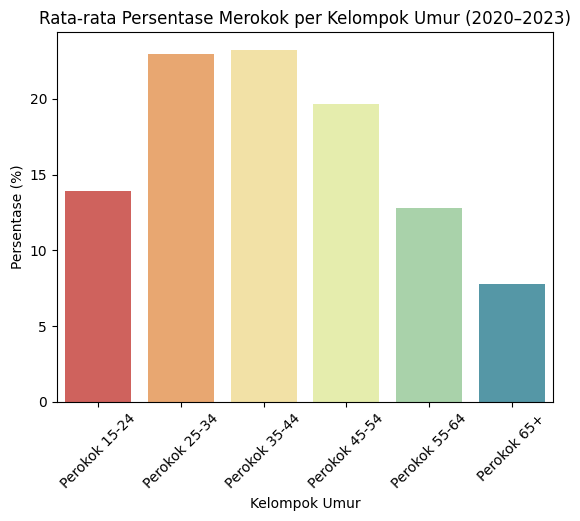

In [26]:
# Rata-rata Persentase Merokok Kelompok Umur (2020–2023)

rata_umur = gdata.drop(columns=["tahun", "Wilayah"]).mean()
sns.barplot(x=rata_umur.index, y=rata_umur.values, palette="Spectral")
# for i, v in enumerate(rata_umur.values):
#     lb.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.title("Rata-rata Persentase Merokok per Kelompok Umur (2020–2023)")
plt.ylabel("Persentase (%)")
plt.xlabel("Kelompok Umur")
plt.xticks(rotation=45)
plt.show()

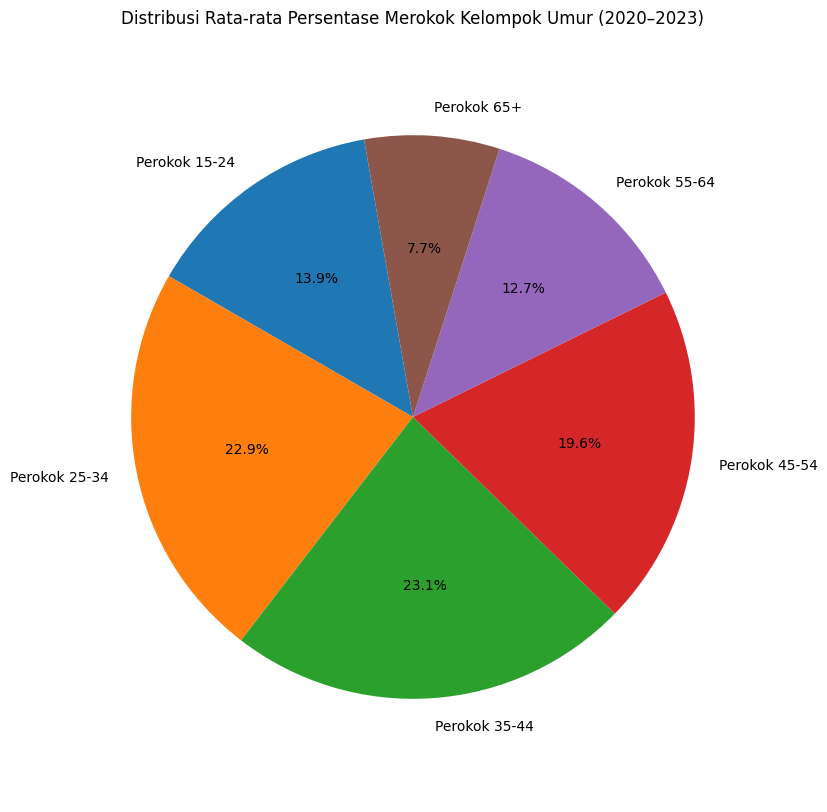

In [27]:
# Rata-rata per distribusi kelompok umur (2020-2023)

bl = gdata.drop(columns=["tahun", "Wilayah"]).mean()
plt.figure(figsize=(8, 10))
plt.pie(bl, labels=bl.index, autopct='%1.1f%%', startangle=100)
plt.title("Distribusi Rata-rata Persentase Merokok Kelompok Umur (2020–2023)")
plt.axis('equal')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15200\1199898751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_25_34.values, y=age_25_34.index, palette="magma")


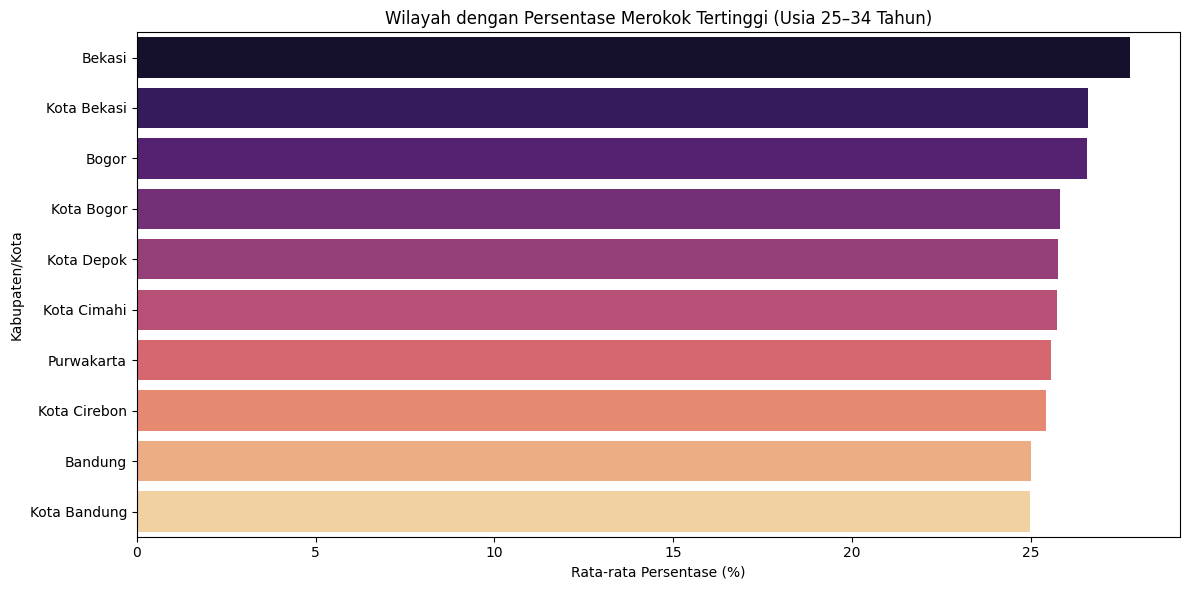

In [28]:
# Wilayah dengan Persentase Merokok Tertinggi (Usia 25–34 Tahun)
age_25_34 = gdata.groupby("Wilayah")["Perokok 25-34"].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=age_25_34.values, y=age_25_34.index, palette="magma")
plt.title("Wilayah dengan Persentase Merokok Tertinggi (Usia 25–34 Tahun)")
plt.xlabel("Rata-rata Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15200\2864130322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_total.values, y=top_total.index, palette="rocket")


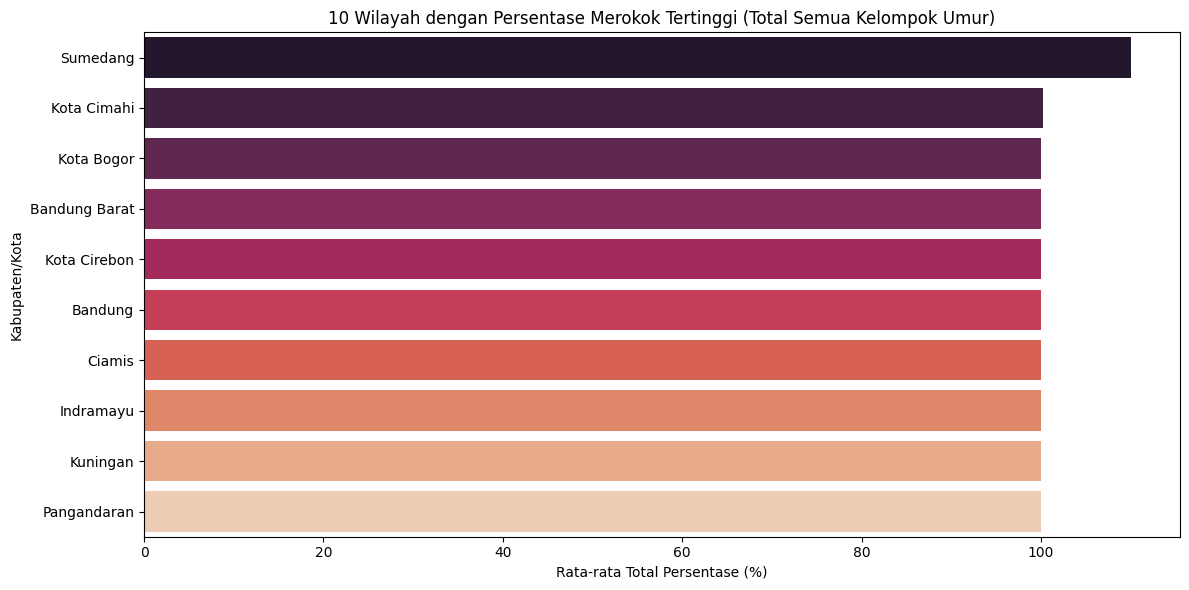

In [29]:
# Hitung total persentase untuk setiap baris
gdata["Total_Persentase"] = gdata.drop(columns=["Wilayah", "tahun"]).sum(axis=1)

# Ambil rata-rata total per wilayah
top_total = gdata.groupby("Wilayah")["Total_Persentase"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_total.values, y=top_total.index, palette="rocket")
plt.title("10 Wilayah dengan Persentase Merokok Tertinggi (Total Semua Kelompok Umur)")
plt.xlabel("Rata-rata Total Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15200\2728364526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_age_group.values, y=avg_by_age_group.index, palette='viridis')


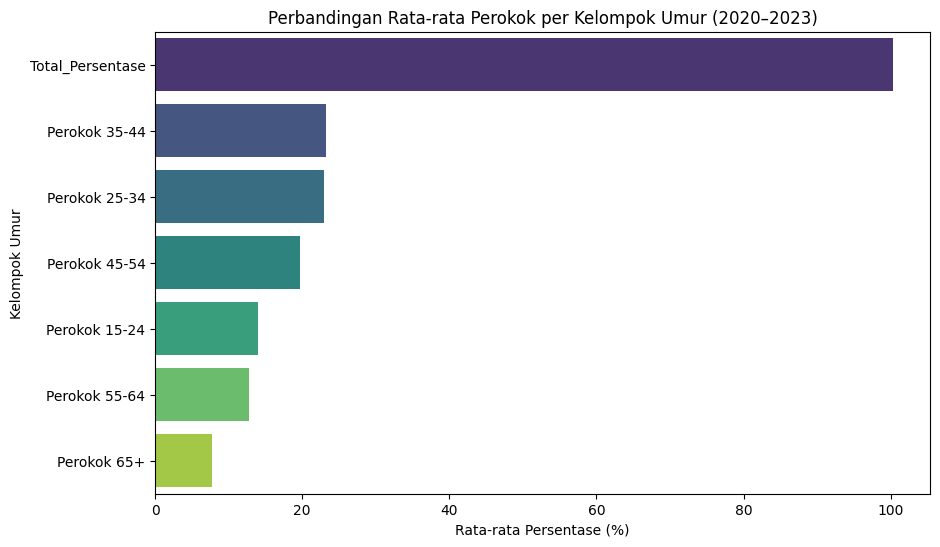

In [30]:
# Barplot rata-rata per kelompok umur
avg_by_age_group = gdata.drop(columns=["tahun", "Wilayah"]).mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_by_age_group.values, y=avg_by_age_group.index, palette='viridis')
plt.xlabel("Rata-rata Persentase (%)")
plt.ylabel("Kelompok Umur")
plt.title("Perbandingan Rata-rata Perokok per Kelompok Umur (2020–2023)")
plt.xlim(0, max(avg_by_age_group) + 5)
plt.show()


In [31]:
# import numpy as np
# kol_perokok = ['Perokok 15-24', 'Perokok 25-34', 'Perokok 35-44', 'Perokok 45-54', 'Perokok 55-64', 'Perokok 65+']
# for kolom in kol_perokok:
#     rata = data[(data[kolom] >= 0) & (data[kolom] <= 100)][kolom].mean()
#     data.loc[(data[kolom] < 0) | (data[kolom] > 100), kolom] = rata
# stat = data[kol_perokok].describe(include='all').T

# stat["range"] = stat["max"] - stat["min"]
# data.reset_index(inplace=True)
# stat.rename(columns={"index": "Kelompok Umur"}, inplace=True)

# stat.describe(include='all').T
# data2.describe(include='all').T
# data